In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
df = pd.read_excel(r'datasets/sample.xls')

In [4]:
df.shape

(641, 15)

In [5]:
df.head()

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
0,MADHYA PRADESH,JHABUA,6.24,NaN,NaN,NaN,9.64,NaN,NaN,6.83,NaN,NaN,5.68,NaN,7.37
1,JAMMU & KASHMIR,JAMMU,5.91,NaN,NaN,NaN,5.49,NaN,NaN,4.50,NaN,NaN,5.13,NaN,5.21
2,BIHAR,DARBHANGA,3.30,NaN,NaN,NaN,4.44,NaN,NaN,4.23,NaN,NaN,3.65,NaN,4.76
3,BIHAR,SHEOHAR,1.44,NaN,NaN,NaN,2.76,NaN,NaN,3.25,NaN,NaN,2.52,NaN,3.04
4,MIZORAM,LUNGLEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.sort_values(['STATE', 'DISTRICT'], ascending=[True, True])

In [7]:
df

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42


In [31]:
# set the filepath and load in a shapefile
fp = "maps3/IND_adm2.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [32]:
map_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."
5,105,IND,India,2,Andhra Pradesh,6,East Godavari,District,District,None,None,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
6,105,IND,India,2,Andhra Pradesh,7,Guntur,District,District,None,None,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."
7,105,IND,India,2,Andhra Pradesh,8,Krishna,District,District,None,Kistna,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15..."
8,105,IND,India,2,Andhra Pradesh,9,Kurnool,District,District,None,None,"POLYGON ((78.88907 16.09856, 78.90118 16.09762..."
9,105,IND,India,2,Andhra Pradesh,10,Nellore,District,District,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."


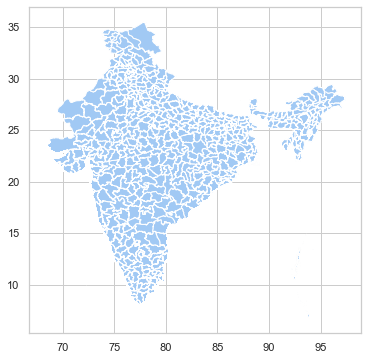

In [33]:
map_df.plot()

In [29]:
map_df['DISTRICT'] = map_df.DISTRICT.str.upper()
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,NICOBAR ISLANDS,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,NORTH AND MIDDLE ANDAMAN,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,SOUTH ANDAMAN,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,ANANTAPUR,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,CHITTOOR,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


In [30]:
df.join(map_df.set_index(['DISTRICT','STATE']), on=['DISTRICT','STATE'])

KeyError: 'DISTRICT'

In [13]:
df

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,DST_ID,geometry
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN,None
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,NaN,None
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN,NaN,None
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75,420.0,"POLYGON ((76.76833 14.94549, 76.81864 15.03257..."
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67,427.0,"POLYGON ((78.11968 13.72745, 78.22780 13.73033..."
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41,397.0,"POLYGON ((81.80183 17.90475, 81.90811 17.93792..."
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06,409.0,"POLYGON ((79.23156 16.36578, 79.31224 16.50523..."
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19,407.0,"POLYGON ((80.12446 16.74148, 80.04343 16.84573..."
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06,414.0,"POLYGON ((77.48987 15.88969, 78.05093 15.83745..."
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42,413.0,"POLYGON ((78.93877 16.04833, 78.98919 16.19804..."


In [14]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Jan 2015     27
Feb 2015    648
Mar 2015    582
Apr 2015    585
May 2015    153
Jun 2015    648
Jul 2015    648
Aug 2015     27
Sep 2015    648
Oct 2015    648
Nov 2015     24
Dec 2015    648
Jan 2016     42
DST_ID      277
geometry    277
dtype: int64

In [15]:
print(df[df["geometry"].isnull()][['DISTRICT','STATE']])

                         DISTRICT                STATE
568                       NICOBAR    ANDAMAN & NICOBAR
394        NORTH & MIDDLE ANDAMAN    ANDAMAN & NICOBAR
403                 SOUTH ANDAMAN    ANDAMAN & NICOBAR
369   SRI POTTI SRIRAMULU NELLORE       ANDHRA PRADESH
570                        Y.S.R.       ANDHRA PRADESH
88                          ANJAW    ARUNACHAL PRADESH
614                  KURUNG KUMEY    ARUNACHAL PRADESH
607           LOWER DIBANG VALLEY    ARUNACHAL PRADESH
106                    PAPUM PARE    ARUNACHAL PRADESH
496                   UPPER SIANG    ARUNACHAL PRADESH
208                         BAKSA                ASSAM
373                       CHIRANG                ASSAM
233                    DIMA HASAO                ASSAM
189           KAMRUP METROPOLITAN                ASSAM
344                     SIVASAGAR                ASSAM
289                      UDALGURI                ASSAM
245                         ARWAL                BIHAR
562       